In [2]:
import importlib
from __imports__ import *
import data, LSTM_returns, optimization
importlib.reload(data)

<module 'data' from 'c:\\Users\\ic2594\\crypto\\AAA_Thursday1\\data\\__init__.py'>

In [65]:
df = data.load_asset('SOLUSDT', sampling='1d')
df = data.add_fear_and_greed(df)
df = data.subset(df, pd.Timestamp('2024-01-01'), pd.Timestamp('2024-03-01'))
df['Market Return'] = df['Close'].pct_change()
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,F&G,F&G category,Market Return
Open time,,,,,,,,,,,,
2024-01-02,109.93,116.95,106.02,106.73,7831366.05,8.727018e+08,1029366,4008477.70,4.468272e+08,71.0,Greed,-0.028933
2024-01-03,106.72,109.90,85.00,98.52,12221060.38,1.229681e+09,1428502,6232536.62,6.274338e+08,70.0,Greed,-0.076923
2024-01-04,98.52,108.15,96.60,104.91,7235482.95,7.374641e+08,828177,3653791.90,3.724890e+08,68.0,Greed,0.064860
2024-01-05,104.91,105.48,95.23,99.94,6703567.21,6.706546e+08,792668,3291710.91,3.293771e+08,72.0,Greed,-0.047374
2024-01-06,99.93,100.30,91.53,93.77,5151478.03,4.896172e+08,613981,2480905.00,2.359553e+08,70.0,Greed,-0.061737
2024-01-07,93.77,96.80,87.68,89.44,5547334.15,5.181070e+08,610413,2580916.31,2.412829e+08,71.0,Greed,-0.046177
2024-01-08,89.44,99.97,85.16,97.88,9677497.13,8.989410e+08,1011344,4710092.51,4.382035e+08,71.0,Greed,0.094365
2024-01-09,97.88,104.89,95.25,99.36,8574930.67,8.569969e+08,1264291,4321290.81,4.323389e+08,76.0,Extreme Greed,0.015121
2024-01-10,99.36,105.52,91.68,102.00,8634280.07,8.442728e+08,1171099,4381449.74,4.288478e+08,73.0,Greed,0.026570


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Log = []
use_exits = True

def objective(trial, optimal_params=None):
    if trial is not None:
        window = trial.suggest_int('window', 5, 50)
        # threshold = trial.suggest_float('threshold', 0.1, 2.0)
        long = trial.suggest_float('long', -2.0, -0.1)
        short = trial.suggest_float('short', 0.1, 2.0)
        long_exit = trial.suggest_float('long_exit', -2.0, 0.5)
        short_exit = trial.suggest_float('short_exit', -0.5, 2.0)

    if optimal_params is not None:
        window = optimal_params['window']
        long = optimal_params['long']
        short = optimal_params['short']
        long_exit = optimal_params['long_exit']
        short_exit = optimal_params['short_exit']

    moving_avg = df['Close'].rolling(window=window).mean()
    moving_std = df['Close'].rolling(window=window).std()
    z_score = (df['Close'] - moving_avg) / moving_std


    df['Long'] = False
    df['Short'] = False
    df['Position'] = 0.0

    if use_exits:
        # enter_long = df[(z_score < long) & (z_score.shift(1) >= long)].index
        # enter_short = df[(z_score > short) & (z_score.shift(1) <= short)].index
        # exit_long = df[(z_score > long_exit) & (z_score.shift(1) <= long_exit)].index
        # exit_short = df[(z_score < short_exit) & (z_score.shift(1) >= short_exit)].index

        # long_indices = []
        # short_indices = []

        # for (indices, enter, exit, buy, col) in [
        #     [ long_indices, enter_long, exit_long, 1, 'Long' ],
        #     [ short_indices, enter_short, exit_short, 1, 'Short' ],
        # ]:
        #     i = 0
        #     j = 0
        #     entered = False
        #     exited = False
        #     while i < len(enter) and j < len(exit):
        #         if enter[i] < exit[j]:
        #             if not entered:
        #                 indices.append((enter[i], 1))
        #                 entered = True
        #                 exited = False
        #             i += 1
        #         else:
        #             if not exited:
        #                 indices.append((exit[j], 0))
        #                 exited = True
        #                 entered = False
        #             j += 1
        #         if i < len(enter):
        #             indices.append((enter[i], 1))
        #         if j < len(exit):
        #             indices.append((exit[j], 0))

        #     for (thing1, thing2) in zip(indices[0:-1], indices[1:]):
        #         index1, action1 = thing1
        #         index2, action2 = thing2
        #         if action1 == 1 and action2 == 0:
        #             df.loc[index1:index2, 'Position'] = buy
        #             df.loc[index1:index2, col] = True
        
        enter_long = df[( (z_score < long) & (z_score.shift(1) >= long) ) | ( (z_score < long) & (z_score.shift(1).isna()) )].index
        enter_short = df[( (z_score > short) & (z_score.shift(1) <= short) ) | ( (z_score > short) & (z_score.shift(1).isna()) )].index
        exit_long = df[(z_score >= long_exit) & (z_score.shift(1) < long_exit)].index
        exit_short = df[(z_score <= short_exit) & (z_score.shift(1) > short_exit)].index

        for (enter, exit, col) in [
            (enter_long, exit_long, 'Long'),
            (enter_short, exit_short, 'Short'),
        ]:
            events = []
            for e in enter:
                events.append((e, 1))  # 1 = enter
            for x in exit:
                events.append((x, 0))  # 0 = exit
            events = sorted(events)

            in_position = False
            for idx, action in events:
                if action == 1 and not in_position:
                    start_idx = idx
                    in_position = True
                elif action == 0 and in_position:
                    df.loc[start_idx:idx, 'Position'] = 1
                    df.loc[start_idx:idx, col] = True
                    in_position = False

            if in_position:
                df.loc[start_idx:, 'Position'] = 1
                df.loc[start_idx:, col] = True
    else:
        df.loc[z_score < long, 'Position'] = 1  # Long
        df.loc[z_score < long, 'Long'] = True
        df.loc[z_score > short, 'Position'] = 1  # Short
        df.loc[z_score > short, 'Short'] = True

    df['Position'] = df['Position'].shift(1)
    df['Strategy Return'] = df['Position'] * df['Market Return']
    df['Short Strategy Return'] = df['Short'] * df['Position'] * df['Market Return']
    df['Long Strategy Return'] = df['Long'] * df['Position'] * df['Market Return']
    df['z-score'] = z_score

    cumulative_returns = (1 + df[['Market Return', 'Strategy Return', 'Long Strategy Return']]).cumprod()
    end_returns = cumulative_returns['Strategy Return'].iloc[-1] - 1
    sharpe_ratio = (df['Strategy Return'].mean() / cumulative_returns['Strategy Return'].std()) * np.sqrt(252)

    return sharpe_ratio, end_returns

def objective_sharpe(trial, optimal_params=None):
    return objective(trial, optimal_params)[0]

def objective_end(trial, optimal_params=None):
    return objective(trial, optimal_params)[1]

In [75]:
import matplotlib.pyplot as plt
import optuna
import optuna.visualization as vis

study = optuna.create_study(direction='maximize')
for i in range(10):
    study.optimize(objective_end, n_trials=100)
    %store study


[I 2025-04-28 15:27:01,064] A new study created in memory with name: no-name-a196926a-9eed-4d4c-bdf0-dea39a742781
[I 2025-04-28 15:27:01,067] Trial 0 finished with value: 0.30887247760825676 and parameters: {'window': 22, 'long': -0.2351144256476272, 'short': 1.2360410844955592, 'long_exit': -1.5593400980949501, 'short_exit': -0.17272638042797145}. Best is trial 0 with value: 0.30887247760825676.
[I 2025-04-28 15:27:01,071] Trial 1 finished with value: 0.33418600862623027 and parameters: {'window': 21, 'long': -0.7965529512727139, 'short': 1.3924142058644484, 'long_exit': 0.07241037890184154, 'short_exit': 1.2942313794689175}. Best is trial 1 with value: 0.33418600862623027.
[I 2025-04-28 15:27:01,074] Trial 2 finished with value: 0.17342463855637402 and parameters: {'window': 14, 'long': -1.4650460597154804, 'short': 1.1380388987974315, 'long_exit': -1.8589625820187397, 'short_exit': 1.1387414469528474}. Best is trial 1 with value: 0.33418600862623027.
[I 2025-04-28 15:27:01,077] Tria

Stored 'study' (Study)


[I 2025-04-28 15:27:02,501] Trial 113 finished with value: 0.17043285196080782 and parameters: {'window': 20, 'long': -0.44583937711980126, 'short': 1.3950994468205407, 'long_exit': -1.444262075808681, 'short_exit': 1.541118151083336}. Best is trial 73 with value: 0.3866018665844375.
[I 2025-04-28 15:27:02,515] Trial 114 finished with value: 0.23705731483953807 and parameters: {'window': 23, 'long': -0.533059291731232, 'short': 1.2733537723103883, 'long_exit': -0.9009645650124758, 'short_exit': 1.3693595144442343}. Best is trial 73 with value: 0.3866018665844375.
[I 2025-04-28 15:27:02,529] Trial 115 finished with value: 0.2153984709736334 and parameters: {'window': 20, 'long': -0.3499348120312629, 'short': 1.5393669314674798, 'long_exit': -0.7843557035878275, 'short_exit': 1.6318115293122102}. Best is trial 73 with value: 0.3866018665844375.
[I 2025-04-28 15:27:02,544] Trial 116 finished with value: 0.21216032686631103 and parameters: {'window': 25, 'long': -0.573848592055166, 'short'

KeyboardInterrupt: 

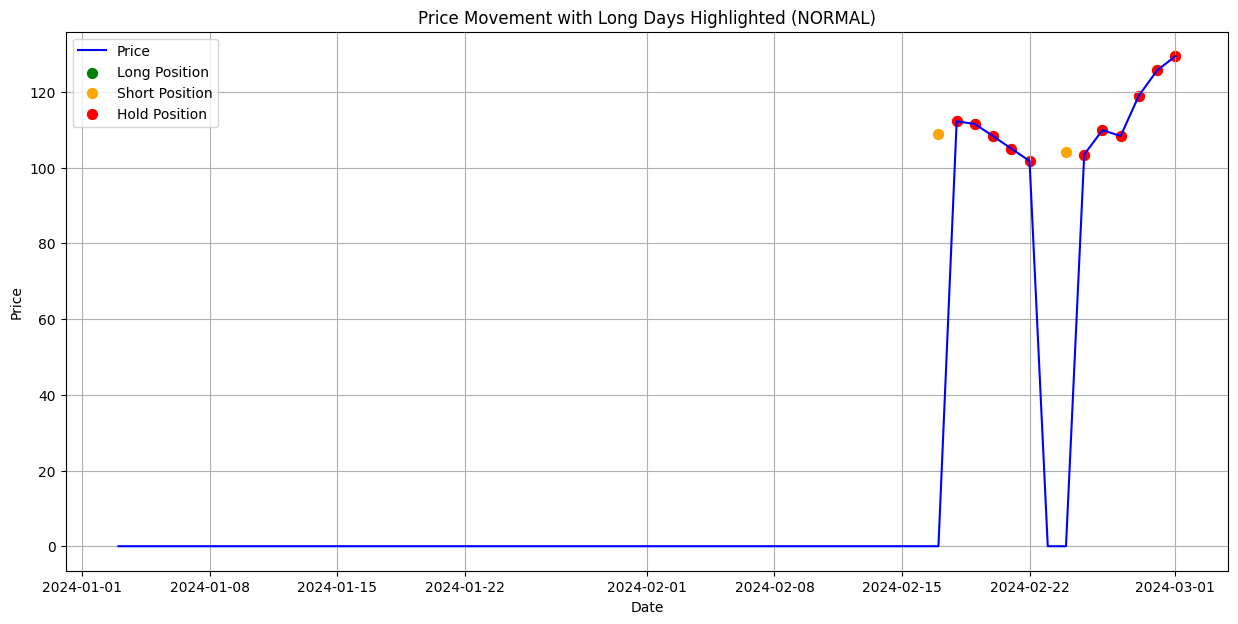

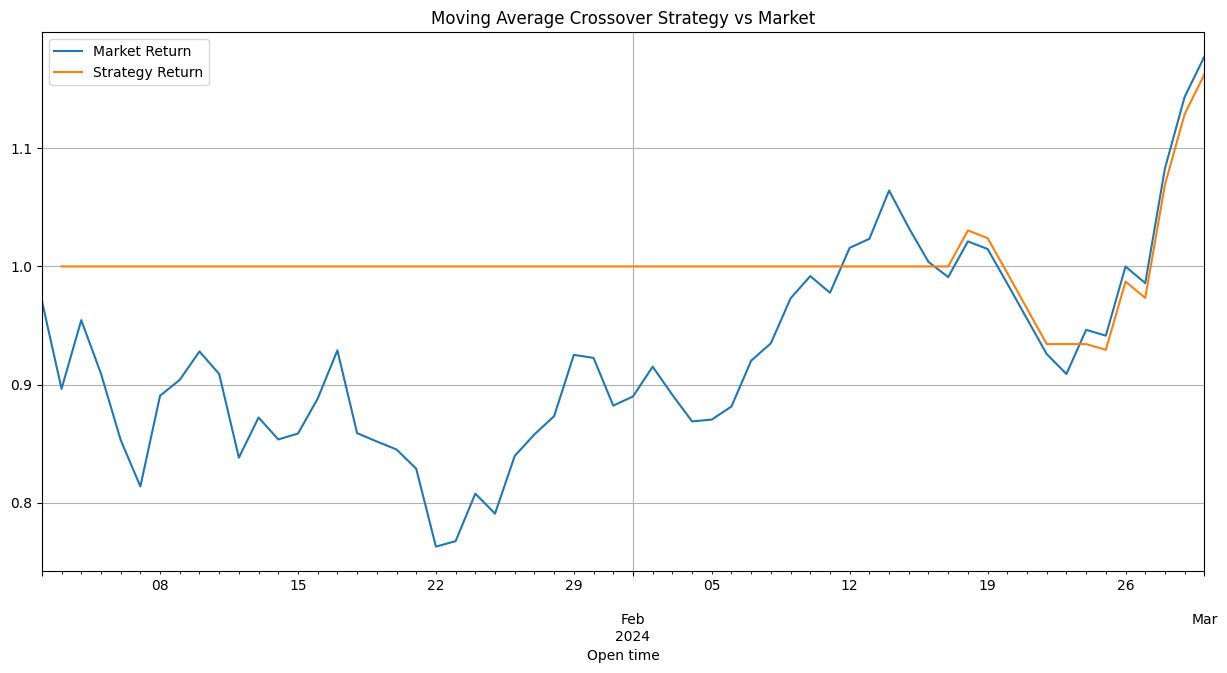

In [74]:
# Use optimal parameters from the best trial
optimal_params = study.best_trial.params
optimal_params = {
    'window': 47,
    'long': -0.66444,
    'short': 0.393263,
    'long_exit': -0.66444,
    'short_exit': 0.393263
}
# optimal_params = {'window': 30, 'long': 1.4193168202203523, 'short': 1.0111870832321064, 'buy_long': 0.9804809925178282, 'buy_short': 0.9994090685190979}
use_exits = False
objective(None, optimal_params=optimal_params)

# Plot setup
plt.figure(figsize=(15,7))

# Plot price
plt.plot(df.index, df['Close'] * df['Position'], label='Price', color='blue')

# Highlight long days
long_days = df['Long'] == True
short_days = df['Short'] == True
hold_days = df['Position'] == 1
plt.scatter(df.index[long_days], df['Close'][long_days], 
            label='Long Position', color='green', marker='o', s=50)
plt.scatter(df.index[short_days], df['Close'][short_days], 
            label='Short Position', color='orange', marker='o', s=50)
plt.scatter(df.index[hold_days], df['Close'][hold_days], 
            label='Hold Position', color='red', marker='o', s=50)

# Titles and labels
plt.title('Price Movement with Long Days Highlighted (NORMAL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

price = df['Close']
(1 + df[['Market Return', 'Strategy Return']]).cumprod().plot(figsize=(15,7))
plt.title('Moving Average Crossover Strategy vs Market')
plt.grid(True)
plt.show()


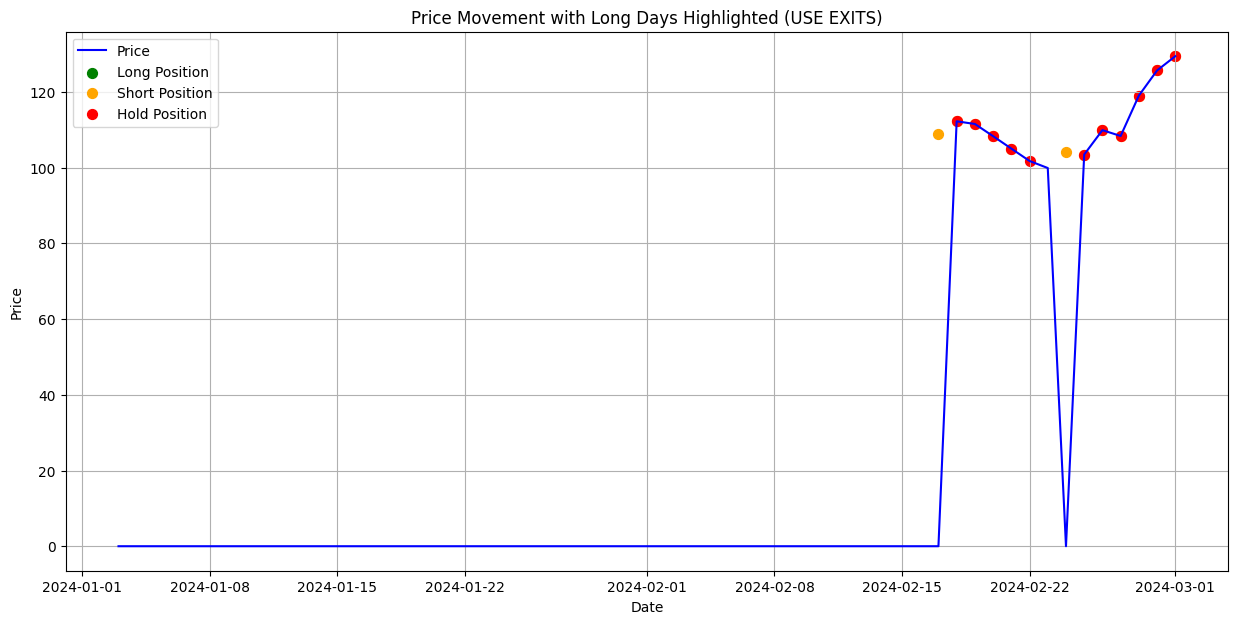

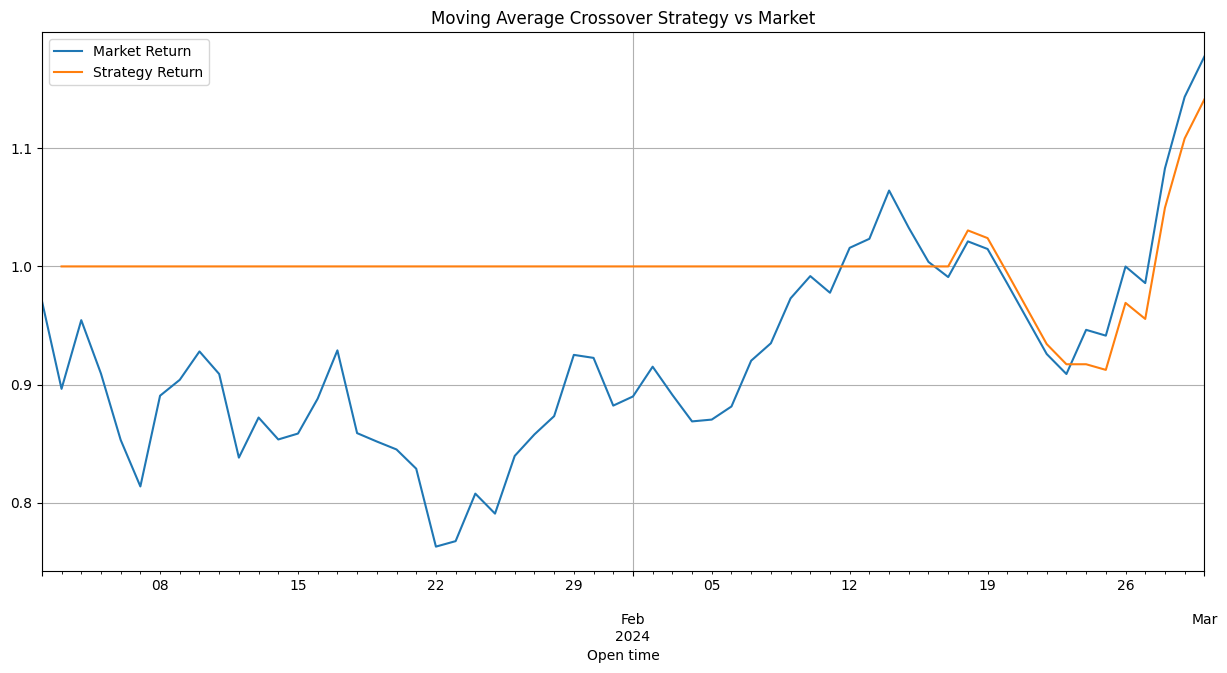

In [76]:
# Use optimal parameters from the best trial
optimal_params = study.best_trial.params
optimal_params = {
    'window': 47,
    'long': -0.66444,
    'short': 0.393263,
    'long_exit': -0.66444,
    'short_exit': 0.393263
}
# optimal_params = {'window': 30, 'long': 1.4193168202203523, 'short': 1.0111870832321064, 'buy_long': 0.9804809925178282, 'buy_short': 0.9994090685190979}
use_exits = True
objective(None, optimal_params=optimal_params)

# Plot setup
plt.figure(figsize=(15,7))

# Plot price
plt.plot(df.index, df['Close']* df['Position'], label='Price', color='blue')

# Highlight long days
plt.scatter(df.index[long_days], df['Close'][long_days], 
            label='Long Position', color='green', marker='o', s=50)
plt.scatter(df.index[short_days], df['Close'][short_days], 
            label='Short Position', color='orange', marker='o', s=50)
plt.scatter(df.index[hold_days], df['Close'][hold_days], 
            label='Hold Position', color='red', marker='o', s=50)

# Titles and labels
plt.title('Price Movement with Long Days Highlighted (USE EXITS)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

price = df['Close']
(1 + df[['Market Return', 'Strategy Return']]).cumprod().plot(figsize=(15,7))
plt.title('Moving Average Crossover Strategy vs Market')
plt.grid(True)
plt.show()


In [71]:
df['z-score'].values

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  1.30411813,  1.68850515,  1.52111768,  1.09985607,
        0.67577583,  0.2521155 , -0.006538  ,  0.49572051,  0.41577096,
        1.18633809,  0.96290942,  2.11549167,  2.61293959,  2.71120883])

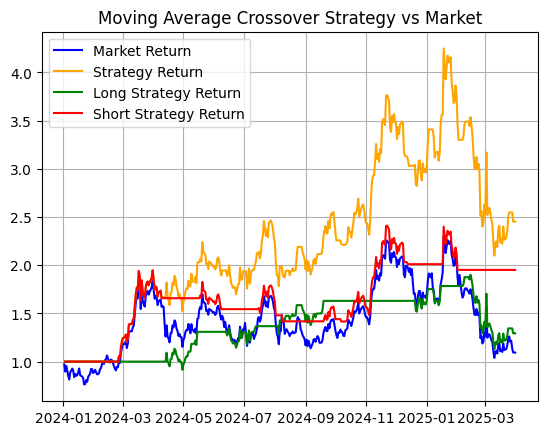

In [36]:
strat = (1 + df[['Market Return', 'Strategy Return']]).cumprod()
long_strat = (1 + df[['Market Return', 'Long Strategy Return']]).cumprod()
short_strat = (1 + df[['Market Return', 'Short Strategy Return']]).cumprod()

plt.plot(strat.index, strat['Market Return'], label='Market Return', color='blue')
plt.plot(strat.index, strat['Strategy Return'], label='Strategy Return', color='orange')
plt.plot(long_strat.index, long_strat['Long Strategy Return'], label='Long Strategy Return', color='green')
plt.plot(short_strat.index, short_strat['Short Strategy Return'], label='Short Strategy Return', color='red')
plt.title('Moving Average Crossover Strategy vs Market')
plt.legend()
plt.grid(True)
plt.show()


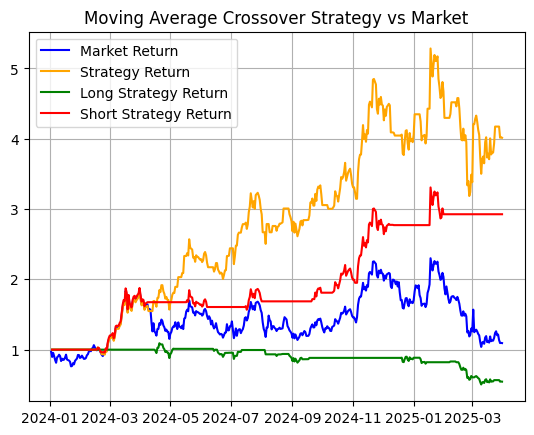

In [38]:
strat = (1 + df[['Market Return', 'Strategy Return']]).cumprod()
long_strat = (1 + df[['Market Return', 'Long Strategy Return']]).cumprod()
short_strat = (1 + df[['Market Return', 'Short Strategy Return']]).cumprod()

plt.plot(strat.index, strat['Market Return'], label='Market Return', color='blue')
plt.plot(strat.index, strat['Strategy Return'], label='Strategy Return', color='orange')
plt.plot(long_strat.index, long_strat['Long Strategy Return'], label='Long Strategy Return', color='green')
plt.plot(short_strat.index, short_strat['Short Strategy Return'], label='Short Strategy Return', color='red')
plt.title('Moving Average Crossover Strategy vs Market')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
# Extract trial parameters and results
trials_data = [
    {**trial.params, 'score': trial.value}
    for trial in study.trials
]

# Convert to a DataFrame
trials_df = pd.DataFrame(trials_data)

# Display the DataFrame
trials_df.sort_values(by="score", ascending=False)

,window,long,short,score
979,43,1.998246,1.093102,0.435163
954,43,1.976879,1.124498,0.435163
958,44,1.967671,1.126513,0.435163
953,44,1.971274,1.122439,0.435163
959,44,1.997968,1.082575,0.435163
...,...,...,...,...
382,46,0.265628,0.725572,-0.552820
627,45,0.159925,0.677771,-0.553744
8,11,0.185033,1.846380,-0.592866
2,42,0.118640,0.459569,-0.610915


In [8]:
trials_df.mean(), trials_df.std()

(window    33.214000
 long       1.353418
 short      0.808929
 score      2.408097
 dtype: float64,
 window    5.128597
 long      0.286598
 short     0.271549
 score     0.834222
 dtype: float64)

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([list(t.params.values()) for t in study.trials if t.value is not None])
y = np.array([t.value for t in study.trials if t.value is not None])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) \
         + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-5, 1e1))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gp.fit(X_scaled, y)

print("Learned kernel:", gp.kernel_)




Learned kernel: 1.22**2 * RBF(length_scale=0.42) + WhiteKernel(noise_level=0.109)


#### Interpretation from ChatGPT:
length-scale: 0.904, noise_level: 0.192
 - ~0.904 std-dev in the input space corresponds to significant change in predicted score.
 - about 19.2% of score variation is due to "noise"